In [2]:
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import numpy as np
import cloudpickle as pickle

In [11]:
# combine the first 5000 images with respective labels
my_batch_9 = {}
labels = np.zeros((5000,1))
data = np.zeros((5000,256*256*3),dtype=int)

In [12]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [13]:
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    
    return image

In [14]:
# matching the first 5000 labels and data
dpi = 80 #inch
IMG_SIZE = 256
my_path_label = glob.glob('testLabels15.csv')
aptos_df = pd.read_csv(my_path_label[0])
in_dir = 'resized_test_15/'

for i in range(40000,45000):
    print (i)
    my_path_image = glob.glob(in_dir+ str(aptos_df['image'][i])+'.jpg')
    image = load_ben_color(my_path_image[0],sigmaX=10)
    labels[i-40000] = aptos_df['level'][i]
    # print (type(image.reshape(1,-1)))
    image = image.reshape(1,-1)
    # print (image.shape)
    data[i-40000] = image

40000
40001
40002
40003
40004
40005
40006
40007
40008
40009
40010
40011
40012
40013
40014
40015
40016
40017
40018
40019
40020
40021
40022
40023
40024
40025
40026
40027
40028
40029
40030
40031
40032
40033
40034
40035
40036
40037
40038
40039
40040
40041
40042
40043
40044
40045
40046
40047
40048
40049
40050
40051
40052
40053
40054
40055
40056
40057
40058
40059
40060
40061
40062
40063
40064
40065
40066
40067
40068
40069
40070
40071
40072
40073
40074
40075
40076
40077
40078
40079
40080
40081
40082
40083
40084
40085
40086
40087
40088
40089
40090
40091
40092
40093
40094
40095
40096
40097
40098
40099
40100
40101
40102
40103
40104
40105
40106
40107
40108
40109
40110
40111
40112
40113
40114
40115
40116
40117
40118
40119
40120
40121
40122
40123
40124
40125
40126
40127
40128
40129
40130
40131
40132
40133
40134
40135
40136
40137
40138
40139
40140
40141
40142
40143
40144
40145
40146
40147
40148
40149
40150
40151
40152
40153
40154
40155
40156
40157
40158
40159
40160
40161
40162
40163
40164
40165
4016

41367
41368
41369
41370
41371
41372
41373
41374
41375
41376
41377
41378
41379
41380
41381
41382
41383
41384
41385
41386
41387
41388
41389
41390
41391
41392
41393
41394
41395
41396
41397
41398
41399
41400
41401
41402
41403
41404
41405
41406
41407
41408
41409
41410
41411
41412
41413
41414
41415
41416
41417
41418
41419
41420
41421
41422
41423
41424
41425
41426
41427
41428
41429
41430
41431
41432
41433
41434
41435
41436
41437
41438
41439
41440
41441
41442
41443
41444
41445
41446
41447
41448
41449
41450
41451
41452
41453
41454
41455
41456
41457
41458
41459
41460
41461
41462
41463
41464
41465
41466
41467
41468
41469
41470
41471
41472
41473
41474
41475
41476
41477
41478
41479
41480
41481
41482
41483
41484
41485
41486
41487
41488
41489
41490
41491
41492
41493
41494
41495
41496
41497
41498
41499
41500
41501
41502
41503
41504
41505
41506
41507
41508
41509
41510
41511
41512
41513
41514
41515
41516
41517
41518
41519
41520
41521
41522
41523
41524
41525
41526
41527
41528
41529
41530
41531
41532
4153

42736
42737
42738
42739
42740
42741
42742
42743
42744
42745
42746
42747
42748
42749
42750
42751
42752
42753
42754
42755
42756
42757
42758
42759
42760
42761
42762
42763
42764
42765
42766
42767
42768
42769
42770
42771
42772
42773
42774
42775
42776
42777
42778
42779
42780
42781
42782
42783
42784
42785
42786
42787
42788
42789
42790
42791
42792
42793
42794
42795
42796
42797
42798
42799
42800
42801
42802
42803
42804
42805
42806
42807
42808
42809
42810
42811
42812
42813
42814
42815
42816
42817
42818
42819
42820
42821
42822
42823
42824
42825
42826
42827
42828
42829
42830
42831
42832
42833
42834
42835
42836
42837
42838
42839
42840
42841
42842
42843
42844
42845
42846
42847
42848
42849
42850
42851
42852
42853
42854
42855
42856
42857
42858
42859
42860
42861
42862
42863
42864
42865
42866
42867
42868
42869
42870
42871
42872
42873
42874
42875
42876
42877
42878
42879
42880
42881
42882
42883
42884
42885
42886
42887
42888
42889
42890
42891
42892
42893
42894
42895
42896
42897
42898
42899
42900
42901
4290

44106
44107
44108
44109
44110
44111
44112
44113
44114
44115
44116
44117
44118
44119
44120
44121
44122
44123
44124
44125
44126
44127
44128
44129
44130
44131
44132
44133
44134
44135
44136
44137
44138
44139
44140
44141
44142
44143
44144
44145
44146
44147
44148
44149
44150
44151
44152
44153
44154
44155
44156
44157
44158
44159
44160
44161
44162
44163
44164
44165
44166
44167
44168
44169
44170
44171
44172
44173
44174
44175
44176
44177
44178
44179
44180
44181
44182
44183
44184
44185
44186
44187
44188
44189
44190
44191
44192
44193
44194
44195
44196
44197
44198
44199
44200
44201
44202
44203
44204
44205
44206
44207
44208
44209
44210
44211
44212
44213
44214
44215
44216
44217
44218
44219
44220
44221
44222
44223
44224
44225
44226
44227
44228
44229
44230
44231
44232
44233
44234
44235
44236
44237
44238
44239
44240
44241
44242
44243
44244
44245
44246
44247
44248
44249
44250
44251
44252
44253
44254
44255
44256
44257
44258
44259
44260
44261
44262
44263
44264
44265
44266
44267
44268
44269
44270
44271
4427

[128 128 128 ... 128 128 128]


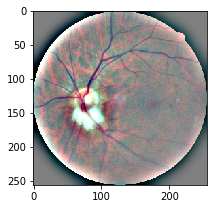

In [32]:
# checking the match
print (my_batch_7['data'][1])
SCALE=1
height, width = IMG_SIZE, IMG_SIZE
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(my_batch_8['data'][4998].reshape(256,256,3), cmap='gray')

In [15]:
# adding labels and data to the dictionary
my_batch_9['labels']= labels
my_batch_9['data']= data

In [16]:
my_batch_9.keys()

dict_keys(['labels', 'data'])

In [17]:
# writing the dictionary to the file
with open('batch_9.pickle','wb') as fp:
    pickle.dump(my_batch_9,fp)

OSError: [Errno 28] No space left on device

In [13]:
# reading the dictionary from the file
with open('batch_8.pickle','rb') as fp:
    d8=pickle.load(fp)

In [16]:
# check that the file export is valid
# how to compare two dictionaries?
data_same = np.allclose(my_batch_2['data'],d2['data'])
data_same

True

['testLabels15.csv']
     image  level    Usage
0   1_left      0  Private
1  1_right      0  Private
2   2_left      0   Public
3  2_right      0   Public
4   3_left      2  Private
<class 'numpy.ndarray'>
[[[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 ...

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]

 [[128 128 128]
  [128 128 128]
  [128 128 128]
  ...
  [128 128 128]
  [128 128 128]
  [128 128 128]]]
(256, 256, 3)
256 256


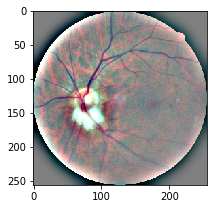

In [33]:
# only for checking
dpi = 80 #inch
IMG_SIZE = 256


my_path_label = glob.glob('testLabels15.csv')
print (my_path_label)

aptos_df = pd.read_csv(my_path_label[0])
print (aptos_df[0:5])
in_dir = 'resized_test_15/'
my_path_image = glob.glob(in_dir+ str(aptos_df['image'][39998])+'.jpg')

# path='train_orig/16_right.jpg' # lower-right, can be class3
image = load_ben_color(my_path_image[0],sigmaX=10)
print (type(image))
print (image)
image = image.reshape(1,-1)
image = image.reshape(256,256,3)
print (image.shape)

height, width = IMG_SIZE, IMG_SIZE
print(height, width)

SCALE=1
figsize = (width / float(dpi))/SCALE, (height / float(dpi))/SCALE

fig = plt.figure(figsize=figsize)
plt.imshow(image, cmap='gray')